<a href="https://colab.research.google.com/github/mosahle7/ML/blob/main/Image_Compression_using_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!kaggle datasets download -d 'rahulogoel/some-random-png-files'

Dataset URL: https://www.kaggle.com/datasets/rahulogoel/some-random-png-files
License(s): MIT
 63% 9.00M/14.2M [00:00<00:00, 30.6MB/s]
100% 14.2M/14.2M [00:00<00:00, 41.2MB/s]


In [3]:
import zipfile
zip_ref=zipfile.ZipFile('/content/some-random-png-files.zip','r')
zip_ref.extractall('/content/png-files')
zip_ref.close()

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [5]:
og_img = plt.imread('/content/png-files/assets/macaw_bird.png')

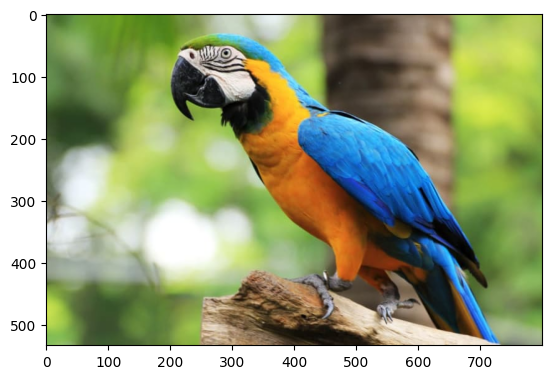

In [6]:
plt.imshow(og_img)

In [7]:
print("Shape of original image: ",og_img.shape)

Shape of original image:  (534, 800, 3)


In [8]:
X_img = np.reshape(og_img, (og_img.shape[0]*og_img.shape[1],3))

In [9]:
K = 16
max_iters = 10

In [10]:
def init_centroids(X, K):
  randidx = np.random.permutation(X.shape[0])
  centroids = X[randidx[:K]]
  return centroids

In [11]:
# def closest_centroids(X, centroids, K):
#   m, n = X.shape
#   cent_idx = np.zeros(m)
#   for i in range(m):
#     m = float('inf')
#     for j in range(K):
#       dis = np.linalg.norm(X[i]-centroids[j])
#       if dis<m:
#         m = dis
#         cent_idx[i] = j
#   return cent_idx


In [12]:
def closest_centroids(X, centroids, K):
  distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
  cent_idx = np.argmin(distances, axis=1)  # (m,)
  return cent_idx


In [13]:
def compute_centroids(X, cent_idx, K):
  m, n = X.shape
  centroids = np.zeros((K,n))

  count = np.bincount(cent_idx, minlength=K).reshape(K,1)

  np.add.at(centroids, cent_idx, X)
  centroids /= count

  return centroids



In [14]:
centroids = init_centroids(X_img, K)
cent_idx = closest_centroids(X_img, centroids, K)
compute_centroids(X_img, cent_idx, K)

array([[0.76759063, 0.41584922, 0.1073663 ],
       [0.42167001, 0.36110996, 0.29767839],
       [0.67796738, 0.72201277, 0.3723157 ],
       [0.77893896, 0.84304915, 0.36916978],
       [0.55442845, 0.53083368, 0.39460468],
       [0.85483651, 0.84607471, 0.2721646 ],
       [0.36772031, 0.19795992, 0.07269083],
       [0.69205827, 0.81144868, 0.30645883],
       [0.70162722, 0.80616283, 0.39633837],
       [0.55496911, 0.70537415, 0.30014744],
       [0.18267128, 0.15843705, 0.1011703 ],
       [0.33731227, 0.50751716, 0.33072275],
       [0.22519248, 0.26546203, 0.24992883],
       [0.5666084 , 0.69720395, 0.6151964 ],
       [0.84527239, 0.87023598, 0.75220389],
       [0.07122017, 0.09502593, 0.11385839]])

In [15]:
def kmeans(X, K):
  m, n = X.shape
  centroids = init_centroids(X, K)

  for i in range(max_iters):
    cent_idx = closest_centroids(X, centroids, K)

    centroids = compute_centroids(X, cent_idx, K)

  return centroids, cent_idx

In [16]:
centroids, cent_idx = kmeans(X_img, K)

In [17]:
print("Centroids: :\n",centroids)
print("Assigned Centroids:\n",cent_idx)

Centroids: :
 [[0.92988675 0.93840387 0.90817653]
 [0.09256408 0.09029648 0.0760157 ]
 [0.2099123  0.2022157  0.15876796]
 [0.66764935 0.69843934 0.57380889]
 [0.39525624 0.5325092  0.22913351]
 [0.46630911 0.23277816 0.07390507]
 [0.66785161 0.78903399 0.36188692]
 [0.47549601 0.41655567 0.31828321]
 [0.76256397 0.40798984 0.10716431]
 [0.60849908 0.53801546 0.42813791]
 [0.79506322 0.82762933 0.69785111]
 [0.3087504  0.33161897 0.21177247]
 [0.25584006 0.66325908 0.91648492]
 [0.82163913 0.83389795 0.29268487]
 [0.52628531 0.66208955 0.30368763]
 [0.09234705 0.3638605  0.69693435]]
Assigned Centroids:
 [4 4 4 ... 3 3 3]


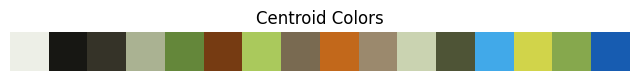

In [18]:
centroids = (centroids * 255).astype(np.uint8)
palette = centroids.reshape(1, 16, 3)
# Display the colors
plt.figure(figsize=(8, 2))
plt.imshow(palette)  # Show as an image
plt.axis("off")  # Hide axes
plt.title("Centroid Colors")
plt.show()

In [19]:
centroids

array([[237, 239, 231],
       [ 23,  23,  19],
       [ 53,  51,  40],
       [170, 178, 146],
       [100, 135,  58],
       [118,  59,  18],
       [170, 201,  92],
       [121, 106,  81],
       [194, 104,  27],
       [155, 137, 109],
       [202, 211, 177],
       [ 78,  84,  54],
       [ 65, 169, 233],
       [209, 212,  74],
       [134, 168,  77],
       [ 23,  92, 177]], dtype=uint8)

In [20]:
# Replace each pixel with the color of the closest centroid
X_recovered = centroids[cent_idx, :]

# Reshape image into proper dimensions
X_recovered = np.reshape(X_recovered, og_img.shape)

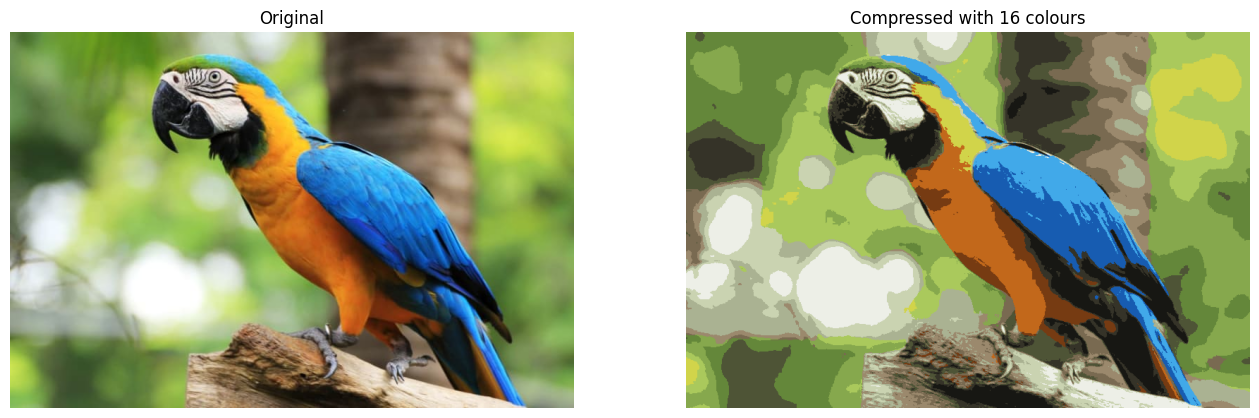

In [21]:
# Display original image
fig, ax = plt.subplots(1,2, figsize=(16,16))
plt.axis('off')

ax[0].imshow(og_img)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_recovered)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()

In [43]:
K = 64
centroids, cent_idx = kmeans(X_img, K)

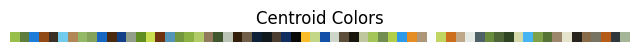

In [44]:
centroids = (centroids * 255).astype(np.uint8)
palette = centroids.reshape(1, K, 3)
# Display the colors
plt.figure(figsize=(8, 2))
plt.imshow(palette)  # Show as an image
plt.axis("off")  # Hide axes
plt.title("Centroid Colors")
plt.show()

In [45]:
# Replace each pixel with the color of the closest centroid
X_recovered = centroids[cent_idx, :]

# Reshape image into proper dimensions
X_recovered = np.reshape(X_recovered, og_img.shape)

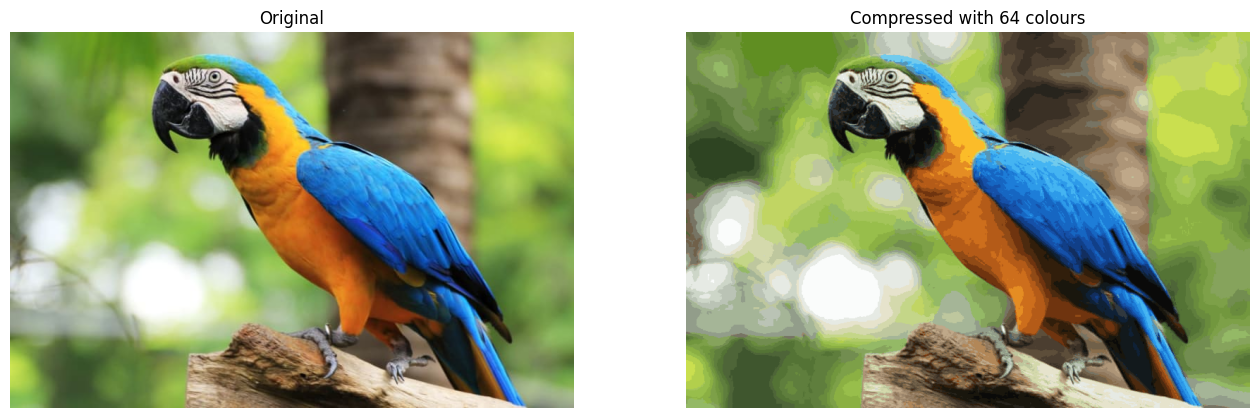

In [46]:
# Display original image
fig, ax = plt.subplots(1,2, figsize=(16,16))
plt.axis('off')

ax[0].imshow(og_img)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_recovered)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()